In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [6]:
# display the first five entries
# Specify the columns to read
usecols = ['v1', 'v2']

# Read the CSV file with specified columns and encoding
data = pd.read_csv("sms_spam.csv", encoding='ISO-8859-1', usecols=usecols)

# Display the first five entries
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
#checking distribution of the dataset
data.groupby('v1').count()


,v2
v1,
ham,4825
spam,747


In [10]:
#renaming columns
data.columns = ['v1', 'v2']

#creating dummy variables for spam and ham
y = pd.get_dummies(data['v2'])
y = y.iloc[:,1].values
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

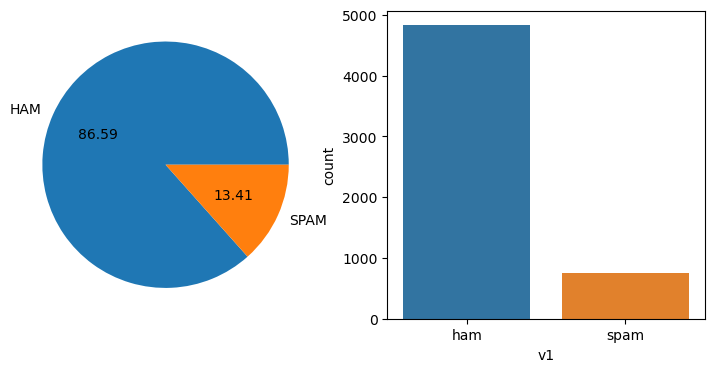

In [13]:
#visualization of the distribution of classes
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(data['v1'].value_counts(),labels=['HAM','SPAM'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=data['v1'].value_counts().index,y=data['v1'].value_counts(),data=data)
plt.show()

                                             

In [14]:
#Utilize the stemmer and tokenizer from nltk to clean up the data using regular expression. Also remove all stop words from the messages.
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import re


In [16]:
stopwords=nltk.corpus.stopwords.words('english')

#cleaning dataset
#creating object for tokenizer
tk = TweetTokenizer() 
#creating object for stemmer
stemmer = SnowballStemmer('english')

corpus = []
#len(data) indicates no. of rows or lines to process
for i in range(0,len(data)):
    message = re.sub('[^a-zA-Z]', ' ', data['v2'][i])     #replace any value other than a-z or A-Z with space
    message = re.sub("Subject", "", message)
    message = message.lower()                               #lowercase all words in a row
    message =tk.tokenize(message)                           
    message = [stemmer.stem(word) for word in message if not\
               word in set(stopwords)] 
    #stemming if word not present in stop words
    message = ' '.join(message)                              #joining list of words to form a sentence
    corpus.append(message)   


In [17]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)       


                                                   text
0     go jurong point crazi avail bugi n great world...
1                                 ok lar joke wif u oni
2     free entri wkli comp win fa cup final tkts st ...
3                   u dun say earli hor u c alreadi say
4                  nah think goe usf live around though
...                                                 ...
5567  nd time tri contact u u pound prize claim easi...
5568                              b go esplanad fr home
5569                                  piti mood suggest
5570  guy bitch act like interest buy someth els nex...
5571                                     rofl true name

[5572 rows x 1 columns]


In [19]:
#Append the label column to the new dataframe
data= df.join(data["v1"], how="outer")
print(data)


                                                   text    v1
0     go jurong point crazi avail bugi n great world...   ham
1                                 ok lar joke wif u oni   ham
2     free entri wkli comp win fa cup final tkts st ...  spam
3                   u dun say earli hor u c alreadi say   ham
4                  nah think goe usf live around though   ham
...                                                 ...   ...
5567  nd time tri contact u u pound prize claim easi...  spam
5568                              b go esplanad fr home   ham
5569                                  piti mood suggest   ham
5570  guy bitch act like interest buy someth els nex...   ham
5571                                     rofl true name   ham

[5572 rows x 2 columns]


In [21]:
#Distribution of most commonly used SPAM words
#create spam corpus which will holds all Spam words
from collections import Counter
spam_corpus = []
for msg in data[data['v1'] == "spam"]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

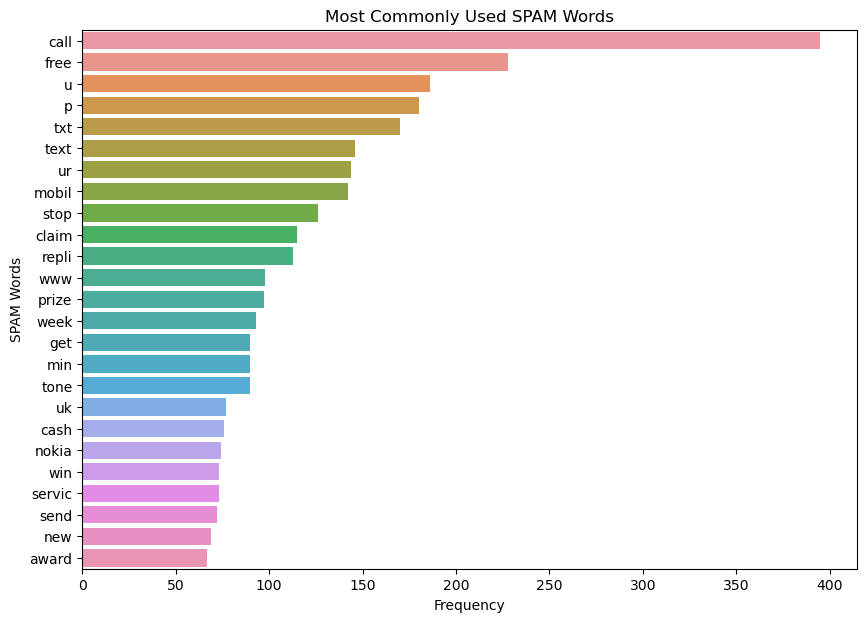

In [22]:
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used SPAM Words")
plt.xlabel("Frequency")
plt.ylabel("SPAM Words")
plt.show()

In [23]:
#Distribution of most commonly used HAM words
#create ham corpus which will holds all ham words
from collections import Counter
ham_corpus = []
for msg in data[data['v1'] == "ham"]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

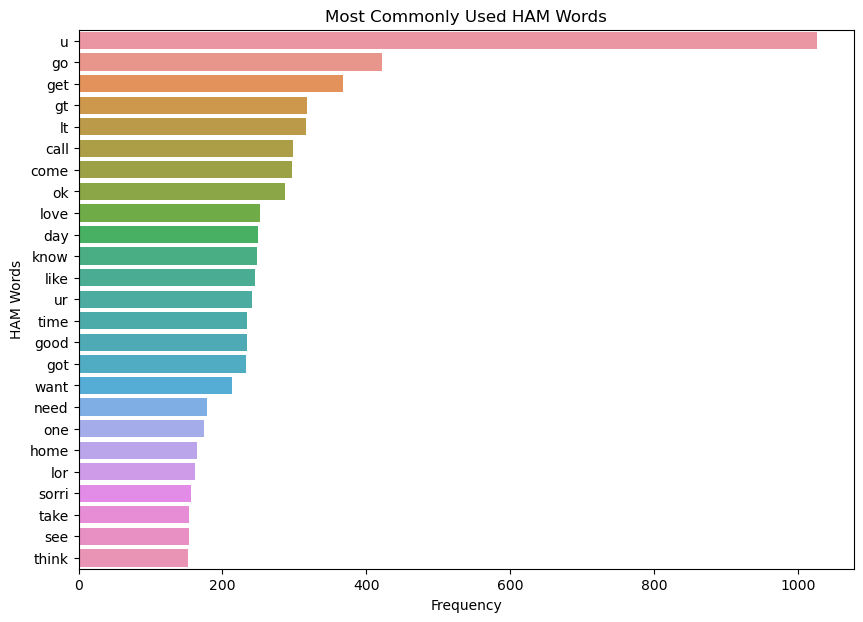

In [24]:
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used HAM Words")
plt.xlabel("Frequency")
plt.ylabel("HAM Words")
plt.show()

In [25]:
!pip install keras
!pip install tensorflow

In [26]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [27]:
words = []
for sent in corpus:
    sent_token = tk.tokenize(sent)
    words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20, random_state = 0)
# prints out the number of message arrays (each containing the cleaned up words in the message) 
print(len(words)) 

5572


In [28]:
print(X_train[5])

['ur', 'luck', 'love', 'someon', 'ur', 'fortun', 'love', 'one', 'love', 'u']


In [29]:
print(len(X_train[5]))

10


In [30]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer
# define the model
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Dense(20, activation='sigmoid'))
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
X_train_seq_padded

array([[   0,    0,    0, ...,   33,  312, 2001],
       [   0,    0,    0, ...,  126, 2002,  159],
       [   0,    0,    0, ...,  453,    8,    6],
       ...,
       [   0,    0,    0, ..., 1457,  133,   32],
       [   0,    0,    0, ..., 1224,  977,   13],
       [   0,    0,    0, ...,  276,  349,  138]])

In [32]:
X_test_seq_padded

array([[   0,    0,    0, ...,    9,   45,  169],
       [   0,    0,    0, ...,    0, 2191,  462],
       [   0,    0,    0, ...,  949, 1694,   27],
       ...,
       [   0,    0,    0, ...,  351, 1089,   14],
       [   0,    0,    0, ...,   87,   17,   73],
       [   0,    0,    0, ...,  184,    4,  215]])

In [33]:
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [34]:
# define the model
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Dense(20, activation='sigmoid'))
#model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,041 (7.97 KB)

 Trainable params: 2,041 (7.97 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fit the model on the training set run for 10 epochs
model.fit(X_train_seq_padded, y_train,
epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4422 - loss: 0.7616 - val_accuracy: 0.9922 - val_loss: 0.3075
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9946 - loss: 0.2572 - val_accuracy: 1.0000 - val_loss: 0.1334
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.1137 - val_accuracy: 1.0000 - val_loss: 0.0742
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0655 - val_accuracy: 1.0000 - val_loss: 0.0447
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0308
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0230
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0214 - val_accuracy: 1.

In [37]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0096
Test results - Accuracy:  100.00%


In [38]:
# define the model
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.summary()
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fit the model on the training set run for 10 epochs
model.fit(X_train_seq_padded, y_train,
epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9947 - loss: 0.4086 - val_accuracy: 1.0000 - val_loss: 0.1552
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.1246 - val_accuracy: 1.0000 - val_loss: 0.0645
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0557 - val_accuracy: 1.0000 - val_loss: 0.0370
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0351 - val_accuracy: 1.0000 - val_loss: 0.0251
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0176 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0142 - val_accuracy: 1.0000 - val_loss: 0.0118
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0129 - val_accuracy: 1.

In [40]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0073
Test results - Accuracy:  100.00%


In [41]:
model.summary()
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fit the model on the training set run for 10 epochs
model.fit(X_train_seq_padded, y_train,
epochs=40, batch_size=32, verbose=1, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9985 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 9.2756e-04
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 7.0534e-04
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 5.8010e-04
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 5.1777e-04
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0017 

In [42]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.8123e-04 
Test results - Accuracy:  100.00%


In [43]:
# define the model
model = Sequential()
model.add(InputLayer(shape=(100,)))
model.add(Dense(2000, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Fit the model on the training set run for 10 epochs
model.fit(X_train_seq_padded, y_train,
epochs=40, batch_size=32, verbose=1, validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 2000)           │       202,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │       200,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,201 (1.53 MB)

 Trainable params: 402,201 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9618 - loss: 0.0439 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 9.0219e-04
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 7.1689e-04
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 5.9049e-04
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9997 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 5.0178e-04
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 5.6442e-04 - val_accuracy: 1.0000 - val_loss: 4.0110e-04
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9997 - l

In [45]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.9697e-04
Test results - Accuracy:  100.00%


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [47]:
classifier = MultinomialNB()
classifier.fit(X_train_seq_padded, y_train)

MultinomialNB()

In [48]:
#Test the model after training
test_results = classifier.predict(X_test_seq_padded)
accuracy = metrics.accuracy_score(y_test, test_results)
print(f'{accuracy * 100:.2f}%')

78.83%
